In [1]:
# Check if running in Google Colab
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

    # Define the base path for your data directory for Colab
    basePath = '/content/drive/MyDrive'

else:
    # Running locally or in a different environment
    basePath = '..'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6) # Default figure size
plt.rcParams["font.size"] = 12

In [3]:
df = pd.read_csv(f"{basePath}/data/processed/unified_countries.csv")

In [4]:
df.head(3)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,Source_Station_ID,Source_Country_Name,Source_Station_Name
0,TS000060765,"GABES, TS",33.88,10.1,4.0,1887,NaN,NaN,NaN,NaN,...,",E",NaN,NaN,NaN,NaN,12.2,E,TS000060765,Tunisia,GABES
1,TS000060765,"GABES, TS",33.88,10.1,4.0,1889,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.7,E,TS000060765,Tunisia,GABES
2,TS000060765,"GABES, TS",33.88,10.1,4.0,1907,NaN,NaN,NaN,NaN,...,",E",NaN,NaN,NaN,NaN,NaN,NaN,TS000060765,Tunisia,GABES


In [5]:
df.shape

(51139, 51)

In [6]:
df.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'CDSD',
       'CDSD_ATTRIBUTES', 'CLDD', 'CLDD_ATTRIBUTES', 'DP01', 'DP01_ATTRIBUTES',
       'DP10', 'DP10_ATTRIBUTES', 'DT00', 'DT00_ATTRIBUTES', 'DT32',
       'DT32_ATTRIBUTES', 'DX32', 'DX32_ATTRIBUTES', 'DX70', 'DX70_ATTRIBUTES',
       'DX90', 'DX90_ATTRIBUTES', 'EMNT', 'EMNT_ATTRIBUTES', 'EMXP',
       'EMXP_ATTRIBUTES', 'EMXT', 'EMXT_ATTRIBUTES', 'FZF0', 'FZF0_ATTRIBUTES',
       'FZF5', 'FZF5_ATTRIBUTES', 'FZF6', 'FZF6_ATTRIBUTES', 'HDSD',
       'HDSD_ATTRIBUTES', 'HTDD', 'HTDD_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES',
       'TAVG', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES', 'Source_Station_ID', 'Source_Country_Name',
       'Source_Station_Name'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51139 entries, 0 to 51138
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATION              51139 non-null  object 
 1   NAME                 51139 non-null  object 
 2   LATITUDE             51139 non-null  float64
 3   LONGITUDE            51139 non-null  float64
 4   ELEVATION            51067 non-null  float64
 5   DATE                 51139 non-null  int64  
 6   CDSD                 38205 non-null  float64
 7   CDSD_ATTRIBUTES      0 non-null      float64
 8   CLDD                 38199 non-null  float64
 9   CLDD_ATTRIBUTES      38199 non-null  object 
 10  DP01                 42636 non-null  float64
 11  DP01_ATTRIBUTES      42636 non-null  object 
 12  DP10                 42636 non-null  float64
 13  DP10_ATTRIBUTES      42636 non-null  object 
 14  DT00                 41223 non-null  float64
 15  DT00_ATTRIBUTES      41223 non-null 

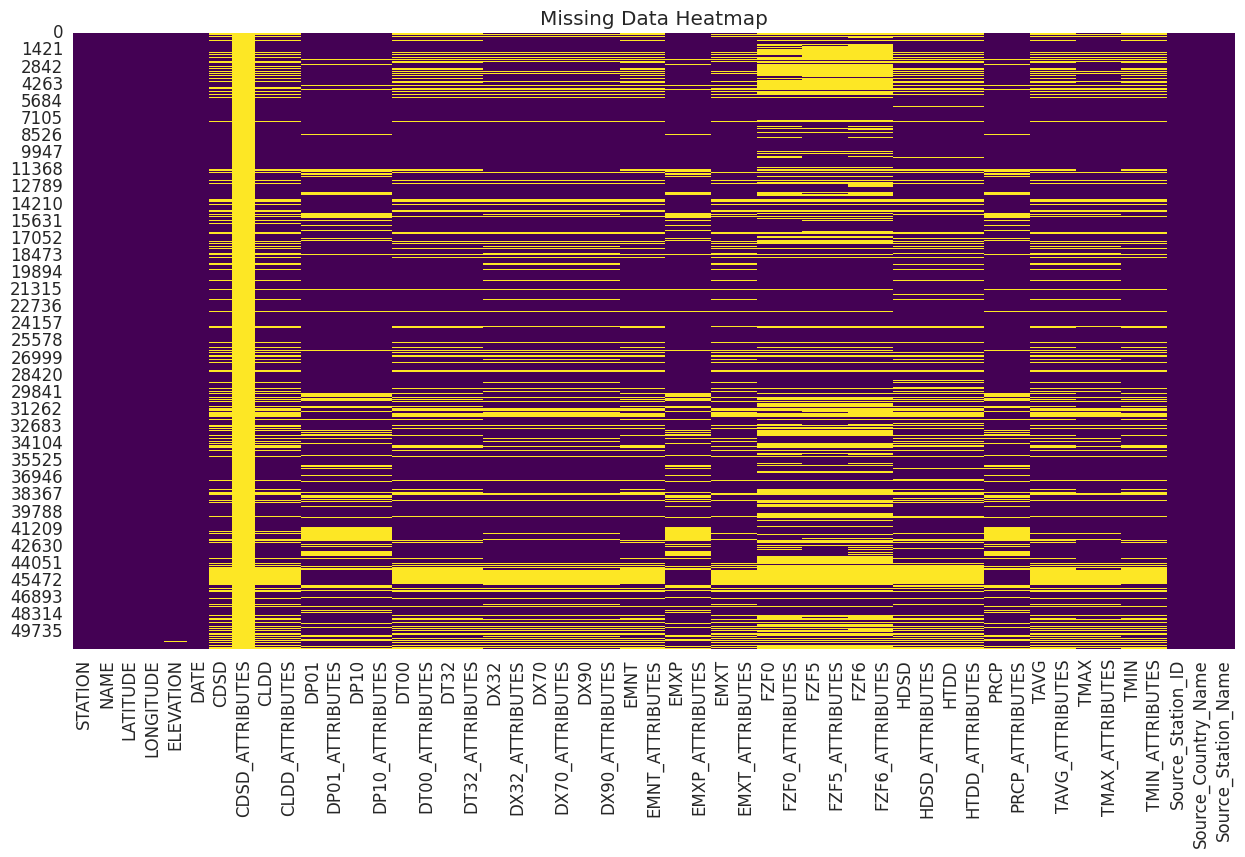

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [9]:
df.describe()

,LATITUDE,LONGITUDE,ELEVATION,DATE,CDSD,CDSD_ATTRIBUTES,CLDD,DP01,DP10,DT00,...,FZF0,FZF5,FZF6,HDSD,HDSD_ATTRIBUTES,HTDD,PRCP,TAVG,TMAX,TMIN
count,51139.000000,51139.000000,51067.000000,51139.000000,38205.000000,0.0,38199.000000,42636.000000,42636.000000,41223.000000,...,33154.000000,33322.000000,31409.000000,37930.000000,37930.000000,37928.000000,42682.000000,38848.000000,41237.000000,41223.000000
mean,32.188088,33.631097,373.945293,1974.751071,643.971009,NaN,643.839996,120.231471,59.642696,39.348931,...,-1.091775,-1.078135,-3.396921,4319.439470,4.182731,4319.495805,780.498836,8.229636,13.595793,3.100956
std,33.158155,88.187849,591.915117,31.971912,956.337583,NaN,956.303893,56.788448,37.720668,56.985063,...,1.370925,1.380406,1.489757,3317.699712,3.001307,3317.696692,862.391150,11.088121,11.539792,11.000489
min,-90.000000,-179.994700,-23.000000,1781.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,-32.200000,-31.100000,-31.100000,0.000000,0.000000,0.000000,0.000000,-51.100000,-47.900000,-54.200000
25%,17.039000,-13.600300,24.000000,1956.000000,21.900000,NaN,21.900000,80.000000,32.000000,0.000000,...,-1.600000,-1.500000,-3.900000,1417.925000,1.000000,1417.975000,318.800000,0.300000,5.300000,-4.700000
50%,43.437800,43.300000,118.000000,1978.000000,163.500000,NaN,163.400000,119.000000,54.000000,2.000000,...,-0.800000,-0.700000,-3.000000,3875.550000,4.000000,3875.550000,547.350000,8.200000,13.500000,3.200000
75%,55.733100,108.016700,438.000000,2000.000000,834.700000,NaN,833.550000,158.000000,78.000000,69.000000,...,-0.200000,-0.200000,-2.500000,6607.475000,7.000000,6607.650000,944.275000,16.700000,22.700000,10.800000
max,82.500000,179.217000,3650.000000,2025.000000,4514.100000,NaN,4514.100000,329.000000,260.000000,366.000000,...,0.000000,0.000000,-2.200000,25336.100000,9.000000,25336.100000,18805.000000,30.700000,38.600000,27.100000


In [10]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

ELEVATION             72
CDSD               12934
CDSD_ATTRIBUTES    51139
CLDD               12940
CLDD_ATTRIBUTES    12940
DP01                8503
DP01_ATTRIBUTES     8503
DP10                8503
DP10_ATTRIBUTES     8503
DT00                9916
DT00_ATTRIBUTES     9916
DT32                9916
DT32_ATTRIBUTES     9916
DX32                9902
DX32_ATTRIBUTES     9902
DX70                9902
DX70_ATTRIBUTES     9902
DX90                9902
DX90_ATTRIBUTES     9902
EMNT                9916
EMNT_ATTRIBUTES     9916
EMXP                8503
EMXP_ATTRIBUTES     8503
EMXT                9902
EMXT_ATTRIBUTES     9902
FZF0               17985
FZF0_ATTRIBUTES    17985
FZF5               17817
FZF5_ATTRIBUTES    17817
FZF6               19730
FZF6_ATTRIBUTES    19730
HDSD               13209
HDSD_ATTRIBUTES    13209
HTDD               13211
HTDD_ATTRIBUTES    13211
PRCP                8457
PRCP_ATTRIBUTES     8457
TAVG               12291
TAVG_ATTRIBUTES    12291
TMAX                9902


In [11]:
missing_percentage = df.isnull().sum() / len(df) * 100 #Not that accrate becz some may have less than len(df) rows...
print(missing_percentage[missing_percentage > 0].round(2))

ELEVATION            0.14
CDSD                25.29
CDSD_ATTRIBUTES    100.00
CLDD                25.30
CLDD_ATTRIBUTES     25.30
DP01                16.63
DP01_ATTRIBUTES     16.63
DP10                16.63
DP10_ATTRIBUTES     16.63
DT00                19.39
DT00_ATTRIBUTES     19.39
DT32                19.39
DT32_ATTRIBUTES     19.39
DX32                19.36
DX32_ATTRIBUTES     19.36
DX70                19.36
DX70_ATTRIBUTES     19.36
DX90                19.36
DX90_ATTRIBUTES     19.36
EMNT                19.39
EMNT_ATTRIBUTES     19.39
EMXP                16.63
EMXP_ATTRIBUTES     16.63
EMXT                19.36
EMXT_ATTRIBUTES     19.36
FZF0                35.17
FZF0_ATTRIBUTES     35.17
FZF5                34.84
FZF5_ATTRIBUTES     34.84
FZF6                38.58
FZF6_ATTRIBUTES     38.58
HDSD                25.83
HDSD_ATTRIBUTES     25.83
HTDD                25.83
HTDD_ATTRIBUTES     25.83
PRCP                16.54
PRCP_ATTRIBUTES     16.54
TAVG                24.03
TAVG_ATTRIBU

In [12]:
type(missing_counts)

pandas.core.series.Series

In [13]:
df['DATE'] = pd.to_numeric(df['DATE'], errors='coerce')

In [14]:
df['ELEVATION'] = pd.to_numeric(df['ELEVATION'], errors='coerce')

In [15]:
print(f"\n--- Number of Duplicate Rows: {df.duplicated().sum()} ---")
if df.duplicated().sum() > 0:
    print("Dropping duplicate rows...")
    df.drop_duplicates(inplace=True)
    print(f"New DataFrame shape after dropping duplicates: {df.shape}")


--- Number of Duplicate Rows: 0 ---


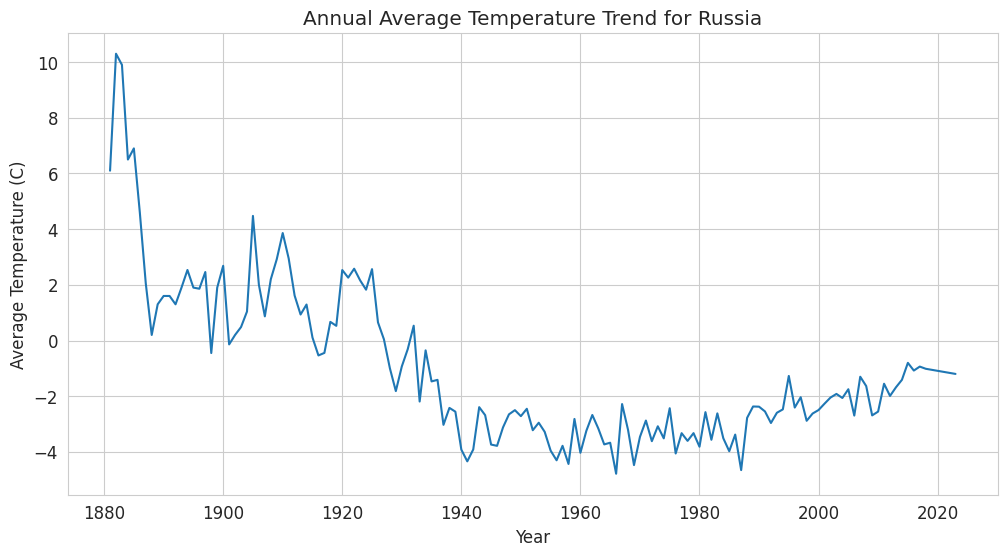

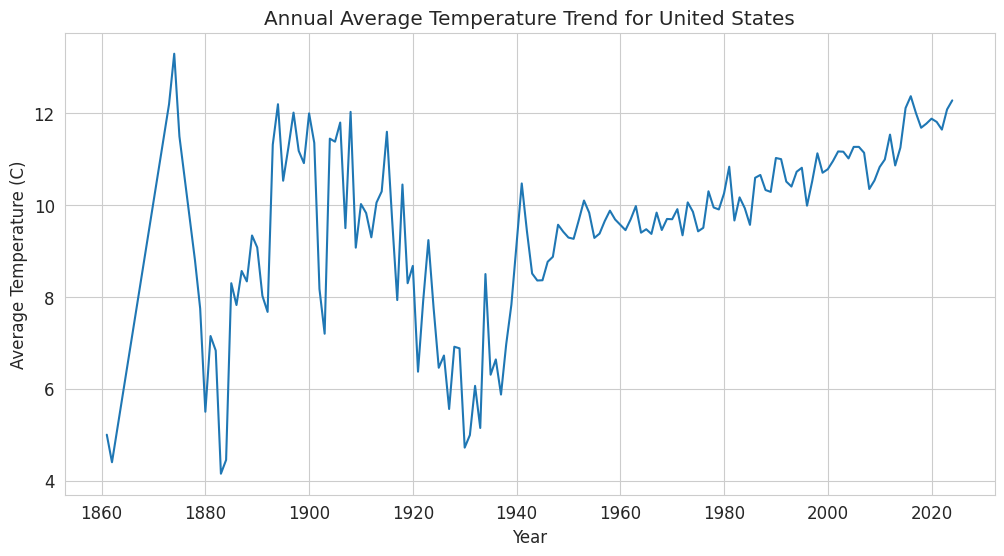

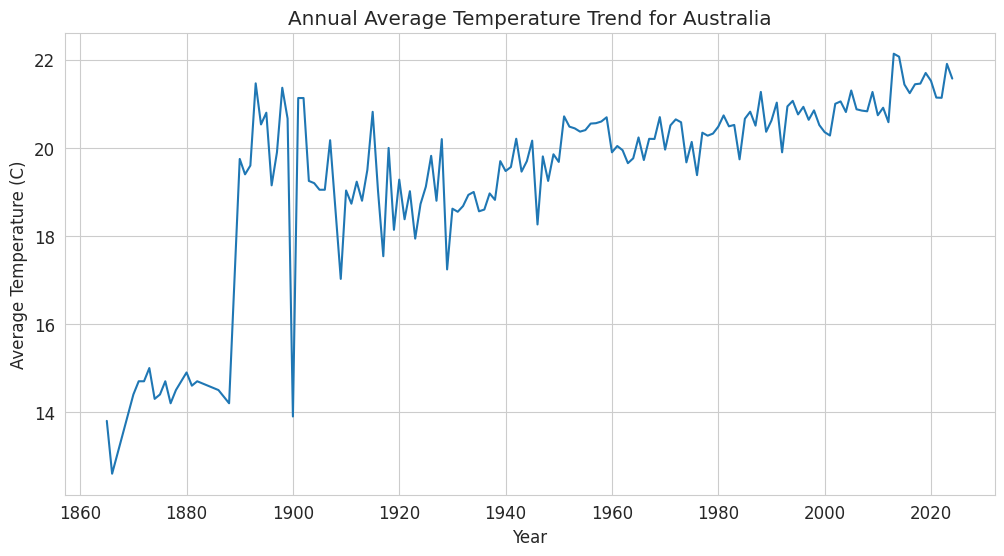

In [16]:
#Just checking if the graph creation is possible...

top_countries = df['Source_Country_Name'].value_counts().head(3).index.tolist()

for country in top_countries:
    country_df = df[df['Source_Country_Name'] == country]
    if 'DATE' in country_df.columns and country_df['DATE'].dtype in ['int64', 'float64']:
        # Average TAVG for the country per year
        yearly_avg_tavg = country_df.groupby('DATE')['TAVG'].mean().reset_index()

        plt.figure(figsize=(12, 6))
        sns.lineplot(x='DATE', y='TAVG', data=yearly_avg_tavg)
        plt.title(f'Annual Average Temperature Trend for {country}')
        plt.xlabel('Year')
        plt.ylabel('Average Temperature (C)')
        plt.show()
    else:
        print(f"  Skipping time series for {country}: 'DATE' column missing or not numeric.")

#The graph has so much corners..may be smoothing out by taking a time window helps..